**Problem Statement**

Due to prevalent fraud in finance domain, it is imperative for credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred onine in two days, where we have 492 frauds out of 284,807 transactions.

**Objective**

Classify fraudulent transaction from non fraudulent transactions using machine learning algorithms.



Importing all required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc



**Loading the dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Finance/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The time in here can be a the proxy used by the bank to the actual time , like the time values follows the ascending order 

The transactions data are confidential and are PCA components of the details of the card

It can be the linear combination of the details about the customers like 
salary*no.years of account
largest transactions of the customer/total no.of years


In [4]:
data.shape

(284807, 31)

In [5]:
from collections import Counter
target = data.values[:,-1]
counter = Counter(target)

for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


the class 0 is the geniune trasactions and the class = 1 is the fraud transaction in the dataset and we can see that only 0.173 are the fraudelent transactions in the data

In [6]:
#checking the datatypes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

except class all other variables are float

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no null values present in the dataset

Distribution of the amount will check 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


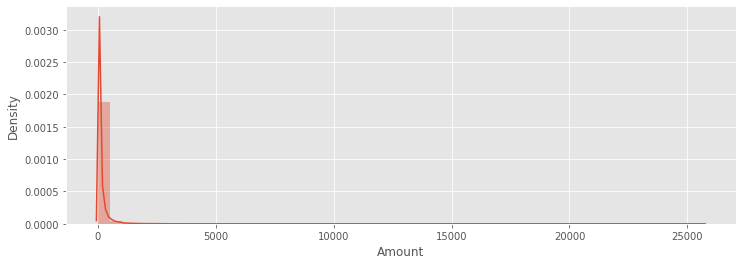

In [8]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.distplot(data['Amount'])


We can see that most of the transactions occured with amount is less or right skewed

Will checkt the distribution of the variables now will create a bins to group the large no.of data points

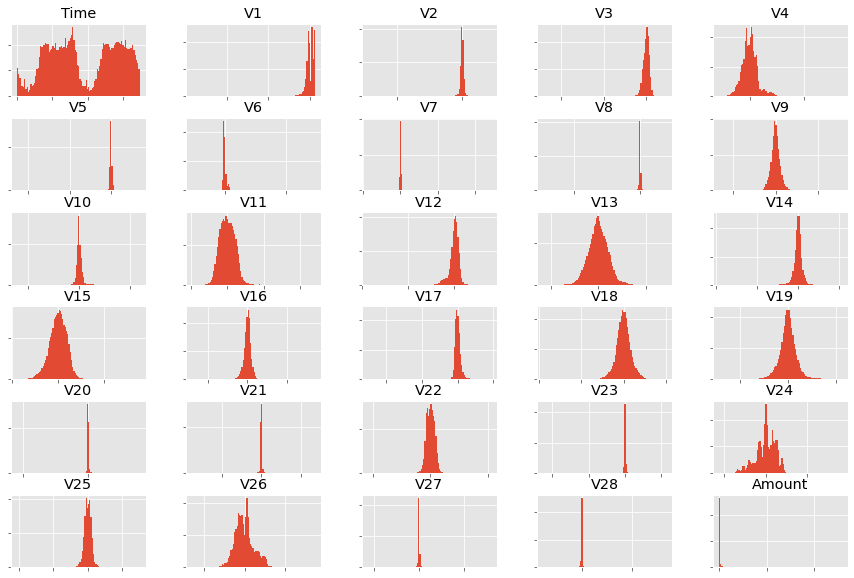

In [9]:
df=  data.drop(columns=['Class'],axis=1)
ax = df.hist(bins=100,figsize=(15,10))
# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
plt.show()

We can see that all the components are normally distributed

**Distribution of time that transactions were conducted for both fraudulent as well as non fraudulent.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


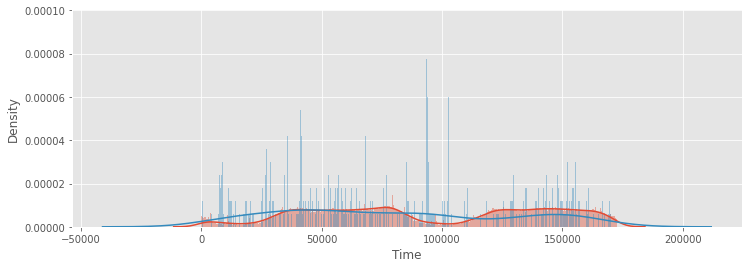

In [10]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")
sns.distplot(data['Time'],kde=True,bins=500)
sns.distplot(data.loc[data['Class'] == 1, 'Time'],kde=True,bins=500)

we can observe some seasonality in the fraudelent transactions and the amount of the transactions also not that high as compared with the geniune transaction s happended at the same time

Will analyse the other variables in the dataset w.r.t the type of transactions

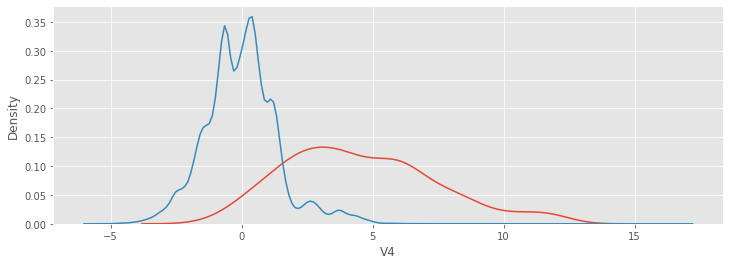

In [11]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")

sns.kdeplot(data.loc[data['Class'] == 1, 'V4'],label='Fraudulent')
sns.kdeplot(data.loc[data['Class'] == 0, 'V4'],label='Normal')

the red line belongs to the fraudelent transactions and the blue line belongs to the geniune transactions and with the help of V4 we can their difference 

Will check the same analysis with other variables in the data

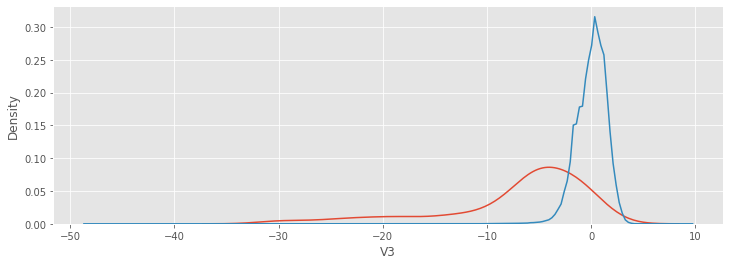

In [12]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")

sns.kdeplot(data.loc[data['Class'] == 1, 'V3'],label='Fraudulent')
sns.kdeplot(data.loc[data['Class'] == 0, 'V3'],label='Normal')

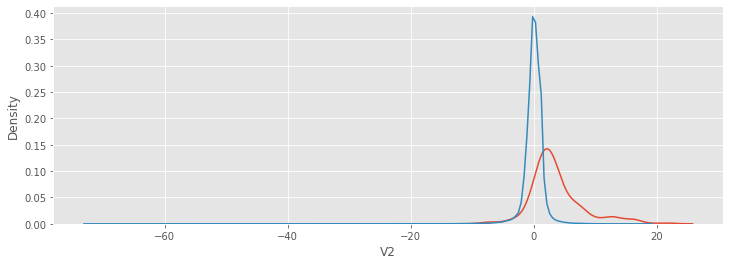

In [13]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")

sns.kdeplot(data.loc[data['Class'] == 1, 'V2'],label='Fraudulent')
sns.kdeplot(data.loc[data['Class'] == 0, 'V2'],label='Normal')

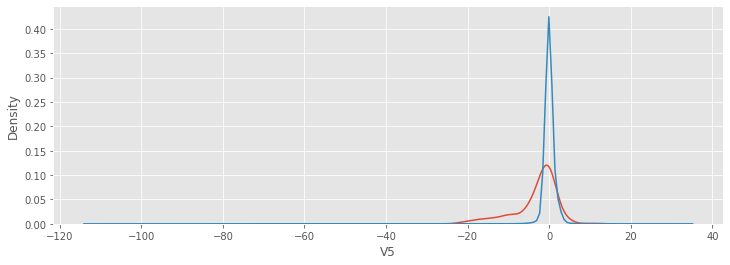

In [14]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")

sns.kdeplot(data.loc[data['Class'] == 1, 'V5'],label='Fraudulent')
sns.kdeplot(data.loc[data['Class'] == 0, 'V5'],label='Normal')

Scatter plot between time of transaction and amount of transaction

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

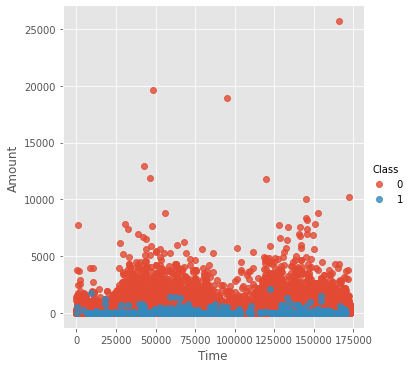

<Figure size 1080x720 with 0 Axes>

In [15]:

plt.figure(figsize=(15,10))
sns.lmplot('Time', # Horizontal axis
           'Amount', # Vertical axis
           data=data, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Class", # Set color
        ) 

plt.figure(figsize=(15,10))



Here we can see that most of the fraduelent transactions are below 1000 and they dont have any specific time pattern

The dataset is highly unbalanced so we use smote algorithm to balance the dataset

In [16]:
X=  data.drop(['Class'],axis=1)
y= data['Class']


In [17]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Now we will check the class ratios

In [35]:
pd.Series(y_sm).value_counts()

1    284315
0    284315
dtype: int64

Now the data is balanced 

Will split the train test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.33, random_state=42)

**Model Building part**

1.Logistic regression

In [43]:
logreg = LogisticRegression(C=0.5)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = logreg.predict(X_test)

In [45]:
conf=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

[[91949  1826]
 [ 3489 90384]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     93775
           1       0.98      0.96      0.97     93873

    accuracy                           0.97    187648
   macro avg       0.97      0.97      0.97    187648
weighted avg       0.97      0.97      0.97    187648



**2.Randomforest**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [48]:
conf=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

[[93754    21]
 [    1 93872]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93775
           1       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648

